<a href="https://colab.research.google.com/github/ChiragJRana/MachineLearning-learning-projects/blob/master/SocialMediaSentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Practice Notebook for Sentimenntal Analysis of Socia Media using Machine Learning**

Importing the libraries


In [ ]:
import re #Regular Expressions
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import string 
import nltk #Natural Language 
import warnings
import itertools
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline


Importing The Dataset

In [ ]:
# Dataset for training purose 
train_dataset = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

train_dataset_copy = train_dataset.copy()

train_dataset.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
# Dataset for  testing purpose  
test_dataset = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')
test_dataset_copy = test_dataset.copy()
test_dataset.head(20)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


## **Data Preprocessing**


In [ ]:
# Combine both the dataset to one dataframe
combine = train_dataset.append(test_dataset,ignore_index=True,sort=True)
combine.head()
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [ ]:
# Remove all the @user from the dataset
def remove_pattern(text, pattern):
  values = re.findall(pattern,text)
  for value in values:
    text = re.sub(value,"",text)
  return text

In [ ]:
# Lets clean the dataset from the @user... values 
# Vectorized Funnctions work faster than normal for loop:
vectorizedfunc = np.vectorize(remove_pattern)
combine['clean_tweets'] = vectorizedfunc(combine['tweet'],'@[\w]*')

In [ ]:
# Remove the punctuations numbbers and pecial characters
combine['clean_tweets'] = combine['clean_tweets'].str.replace('[^a-zA-Z#]',' ')
combine.head(6)

,id,label,tweet,clean_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...


In [ ]:
#  Remove all the small Words from the tweets
combine['clean_tweets'] = combine['clean_tweets'].apply(lambda x: ' '.join([k for k in x.split()  if len(k) > 3]))
combine.head()

,id,label,tweet,clean_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# Tokenize the data
tokenized_tweets = combine['clean_tweets'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweets, dtype: object

## **Stemming**
stemming is a process in which the words are floored by removing the suffixes and prefixes 
eg play, player, playing, plays... 


In [ ]:
from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply( lambda x : [ ps.stem(w) for w in x])
tokenized_tweets.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweets, dtype: object

In [ ]:
for i in range(len(tokenized_tweets)):
  tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

combine['clean_tweets'] = tokenized_tweets
combine.head()

,id,label,tweet,clean_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## **Data Visualisation**
## A Word Cloud is a visualisation where the most recurring word appears to be big in size.


In [ ]:
# importing the librariies
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests 

In [ ]:
# This is the list of the words which have a positive response 
all_words_posiitive = ' '.join(text for text in combine['clean_tweets'][combine['label'] == 0])


In [ ]:
# Combine a Imange with the dataset
Mask =np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
# stream means whether to download ==False or to stream ==True and raw is the atrribute for the request i.e an image

# Now we will take the color of the image and impose it over the wordcloud
image_colours = ImageColorGenerator(Mask)

# Now generate the wordCloud
wc = WordCloud(height=1500,width=4000,mask=Mask).generate(all_words_posiitive)

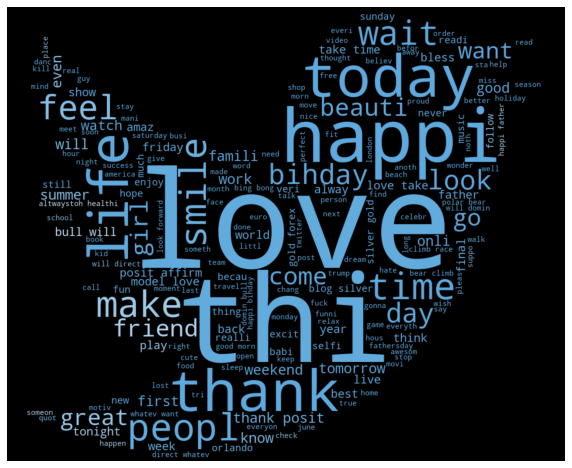

In [ ]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colours),interpolation="hamming")

plt.axis('off')
plt.show()

In [ ]:
all_words_negative = ' '.join(text for text in combine['clean_tweets'][combine['label']==1])

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

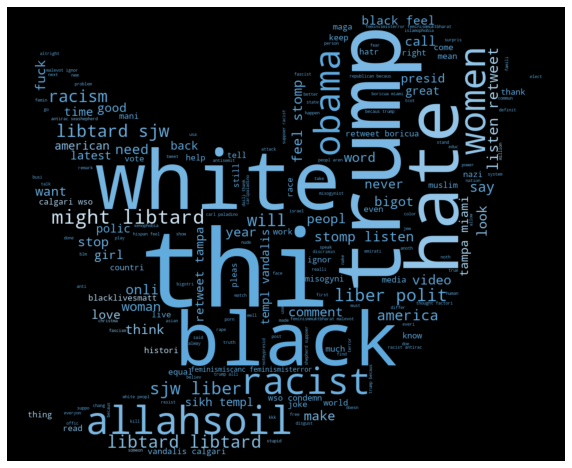

In [ ]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colours),interpolation="hamming")

plt.axis('off')
plt.show()

In [ ]:
#  Remove the hashtags from the twitter
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [ ]:
ht_positive = Hashtags_Extract(combine['clean_tweets'][combine['label']==0])
ht_negative = Hashtags_Extract(combine['clean_tweets'][combine['label']==1])
ht_positive

In [ ]:
ht_positive_unnest = sum(ht_positive,[])
ht_negative_unnest = sum(ht_negative,[])

In [ ]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_positive

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

In [ ]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())}) 
df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


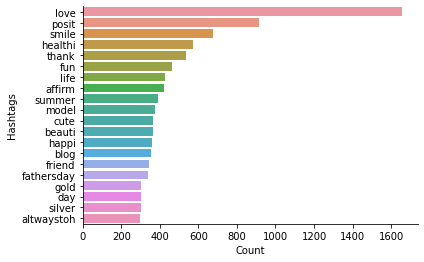

In [ ]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
# nlargest will create a df of the ones with the largest values

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

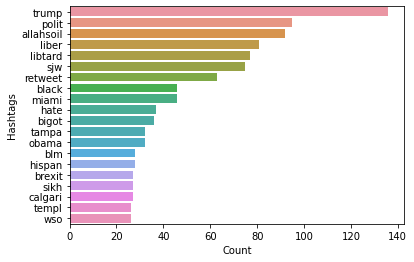

In [ ]:
df_negative_plot = df_negative.nlargest(20,columns='Count')

sns.barplot(data=df_negative_plot,y = 'Hashtags', x  = 'Count')

# **Extract Features From the Clean Tweets**


##**Using the Bag Of Words method**

In [ ]:
# Embedding Technique 1
# Create a sparse matrix of the words using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.9, min_df=2,max_features=1000,stop_words='english')
#  max_df if float it refers to the max percentage of words allowed in the corpus anf min_df if integre means the minimum number of allowed in the corpus and wise-versa.
#  max_features == number to features(unique words) that will be allowed.
bow_mat = cv.fit_transform(combine['clean_tweets'])
df_bow = pd.DataFrame(bow_mat.todense())
df_bow

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##**Term Frequency-Inverse document Frequency**
**or short TF-IDF**

tf = (count of terms/total terms in a file(row))

dif = log(total documents(rows)/number of documments having that word)

tf-idf = tf * idf
**This value defines the importance of a word in the corpus**

In [ ]:
# Embedding Technique 2
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=2, max_df=0.9, max_features=1000, stop_words='english')
tfidf_mat = tfidf.fit_transform(combine['clean_tweets'])
df_tfidf = pd.DataFrame(tfidf_mat.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.532509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.624002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.411886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Splitting the dataset**

In [ ]:
# Using the Bag of Words features
train_bow = bow_mat[:31962]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Using the tf-idf features
train_tfidf = tfidf_mat[:31962]
train_tfidf.todense() 

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
# BOW features
X_train_bow, X_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,combine['label'][:31962],test_size=0.3,random_state=0)
# Tf-Idf feaures
X_train_tfidf, X_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf,combine['label'][:31962],test_size=0.3,random_state=0)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Applying the machine Learning Models**

In [ ]:
# f1 score is to assess the model's performance
# from sklearn.metrics import f1_score

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0,solver='lbfgs')
log_reg.fit(X_train_bow,y_train_bow)
pred_bow = log_reg.predict_proba(X_valid_bow)
# Here we have the probabilities of the tweets falling in the positive , negative. 
pred_bow


array([[9.96507669e-01, 3.49233062e-03],
       [9.85610864e-01, 1.43891360e-02],
       [9.99044840e-01, 9.55159662e-04],
       ...,
       [9.77980017e-01, 2.20199829e-02],
       [9.96660933e-01, 3.33906674e-03],
       [9.92960302e-01, 7.03969752e-03]])

Confusion matrix, without normalization


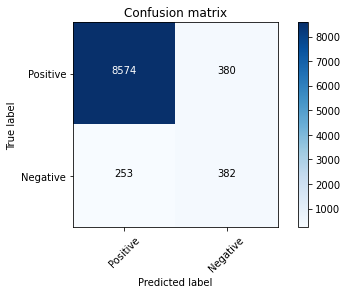

In [ ]:
# Calculating the f1 scores:
pred_int = pred_bow[:,1] >= 0.19
pred_int = pred_int.astype(np.int)
# pred_int
# log_bow = f1_score(y_valid_bow,pred_int)
cm = confusion_matrix(y_valid_bow, pred_int)
plot_confusion_matrix(cm, classes = ['Positive', 'Negative'])
# log_bow

In [ ]:
log_reg.fit(X_train_tfidf,y_train_tfidf)
pred_tfidf = log_reg.predict_proba(X_valid_tfidf)
pred_tfidf

array([[0.99094253, 0.00905747],
       [0.96783764, 0.03216236],
       [0.98771488, 0.01228512],
       ...,
       [0.97286969, 0.02713031],
       [0.98942552, 0.01057448],
       [0.99831354, 0.00168646]])

In [ ]:
# Calculating the f1 scores 
pred_int = pred_tfidf[:,1]>= 0.2
pred_int = pred_int.astype(np.int)
# pred_int
# log_tfidf = f1_score(y_valid_tfidf, pred_int)
# log_tfidf
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf, pred_int)}, f1 score: {f1_score(y_valid_tfidf, pred_int)}')

Accuracy Score : 0.9417040358744395, f1 score: 0.5729564553093964


## **XG-Boost**

Confusion matrix, without normalization
Accuracy Score : 0.9401397434560433, f1 score: 0.5508607198748043


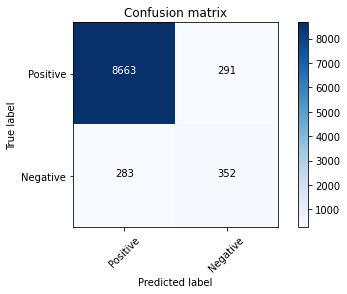

In [ ]:
from xgboost import XGBClassifier
xg_bow = XGBClassifier(random_state=0, learning_rate=0.7)
xg_bow.fit(X_train_bow,y_train_bow)
xgb = xg_bow.predict_proba(X_valid_bow)
# xgb
pred_int = xgb[:,1] >= 0.2
pred_int = pred_int.astype(np.int)
# pred_int
# Calculating the f1 score::
xgb_bow = f1_score(y_valid_bow,pred_int)
xgb_bow
cm = confusion_matrix(y_valid_bow, pred_int)
plot_confusion_matrix(cm, classes = ['Positive', 'Negative'])
print(f'Accuracy Score : {accuracy_score(y_valid_bow, pred_int)}, f1 score: {f1_score(y_valid_bow, pred_int)}')

Confusion matrix, without normalization
Accuracy Score : 0.9456669100010429, f1 score: 0.5368888888888889


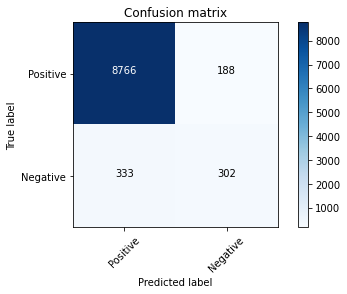

In [ ]:
xgb_tfidf = XGBClassifier(random_state=0,learning_rate=0.6)
xgb_tfidf.fit(X_train_tfidf,y_train_tfidf)
xgb = xgb_tfidf.predict_proba(X_valid_tfidf)
# xgb
pred_int = xgb[:,1] >= 0.3
pred_int = pred_int.astype(np.int)
# pred_int
# Calculating the f1 score 
# xgb_tfidf = f1_score(y_valid_tfidf, pred_int)
# xgb_tfidf
cm = confusion_matrix(y_valid_tfidf, pred_int)
plot_confusion_matrix(cm, classes = ['Positive', 'Negative'])
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf, pred_int)}, f1 score: {f1_score(y_valid_tfidf, pred_int)}')

## **Decision Tree**


Confusion matrix, without normalization
Accuracy Score : 0.9358640108457608, f1 score: 0.5168892380204242


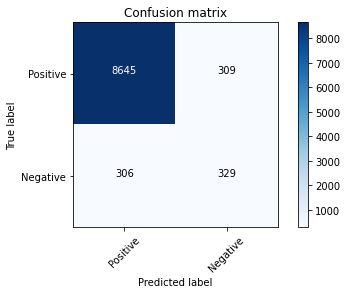

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)
dtc.fit(X_train_bow,y_train_bow)
pred = dtc.predict_proba(X_valid_bow)
# pred
# Calculating the f1 Scores
pred_int = pred[:,1] >= 0.7
pred_int = pred_int.astype(np.int)

# dtc_bow = f1_score(y_valid_bow, pred_int)
# dtc_bow
cm = confusion_matrix(y_valid_bow, pred_int)
plot_confusion_matrix(cm, classes = ['Positive', 'Negative'])
print(f'Accuracy Score : {accuracy_score(y_valid_bow, pred_int)}, f1 score: {f1_score(y_valid_bow, pred_int)}')

Confusion matrix, without normalization
Accuracy Score : 0.9390968818437794, f1 score: 0.5141430948419302


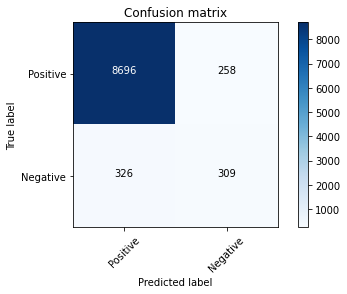

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)
dtc.fit(X_train_tfidf,y_train_tfidf)
pred = dtc.predict_proba(X_valid_tfidf)
# pred
# Calculating the f1 Scores
pred_int = pred[:,1] >= 0.5
pred_int = pred_int.astype(np.int)

# dtc_tfidf = f1_score(y_valid_tfidf, pred_int)
# dtc_tfidf
cm = confusion_matrix(y_valid_tfidf, pred_int)
plot_confusion_matrix(cm, classes = ['Positive', 'Negative'])
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf, pred_int)}, f1 score: {f1_score(y_valid_tfidf, pred_int)}')

 ## MultinomialNB

Confusion matrix, without normalization
Accuracy Score : 0.9389925956825529, f1 score: 0.5255474452554745


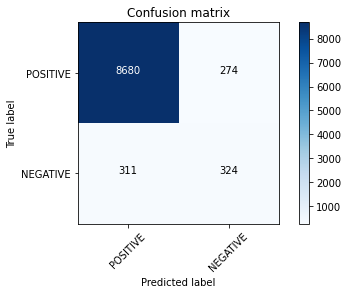

In [ ]:
mono_model = MultinomialNB()
mono_model.fit(X_train_bow, y_train_bow)
y_pred = mono_model.predict(X_valid_bow)
cm = confusion_matrix(y_valid_bow,y_pred)
plot_confusion_matrix(cm,classes=['POSITIVE', 'NEGATIVE'])
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf, y_pred)}, f1 score: {f1_score(y_valid_tfidf, y_pred)}')

Confusion matrix, without normalization
Accuracy Score : 0.9476483470643445, f1 score: 0.41355140186915884


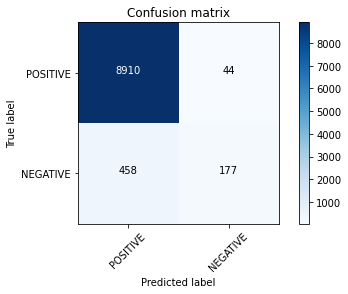

In [ ]:
mono_model = MultinomialNB()
mono_model.fit(X_train_tfidf, y_train_tfidf)
y_pred = mono_model.predict(X_valid_tfidf)
cm = confusion_matrix(y_valid_tfidf,y_pred)
plot_confusion_matrix(cm,classes=['POSITIVE', 'NEGATIVE'])
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf, y_pred)}, f1 score: {f1_score(y_valid_tfidf, y_pred)}')

## PassiveAggressiveClassifier

Confusion matrix, without normalization
Accuracy Score : 0.9350297215559495, f1 score: 0.46978723404255324


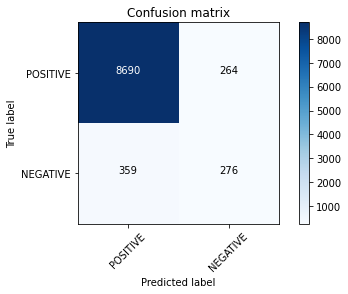

In [ ]:
pasa_model = PassiveAggressiveClassifier()
pasa_model.fit(X_train_bow, y_train_bow)
y_pred = pasa_model.predict(X_valid_bow)
cm = confusion_matrix(y_valid_bow,y_pred)
plot_confusion_matrix(cm,classes=['POSITIVE', 'NEGATIVE'])
print(f'Accuracy Score : {accuracy_score(y_valid_bow,y_pred)}, f1 score: {f1_score(y_valid_bow, y_pred)}')

In [ ]:
pasa_model = PassiveAggressiveClassifier()
pasa_model.fit(X_train_tfidf, y_train_tfidf)
y_pred = pasa_model.predict(X_valid_tfidf)
cm = confusion_matrix(y_valid_tfidf,y_pred)
plot_confusion_matrix(cm,classes=['POSITIVE', 'NEGATIVE'])
print(f'Accuracy Score : {accuracy_score(y_valid_tfidf,y_pred)}, f1 score: {f1_score(y_valid_tfidf, y_pred)}')

## **Comparision Graphs**

In [ ]:
Algo_1 = ['Logistic Regression', 'XGBoost','Decision Tree']
score_bow = [log_bow, xgb_bow, dtc_bow]
score_tfidf = [log_tfidf, xgb_tfidf, dtc_tfidf]
compare_bow = pd.DataFrame({'Model': Algo_1, 'Score': score_bow})
compare_tfidf = pd.DataFrame({'Model': Algo_1, 'Score': score_tfidf})


In [ ]:
# Bag of Words:
compare_bow.T

,0,1,2
Model,Logistic Regression,XGBoost,Decision Tree
Score,0.546886,0.550861,0.514143


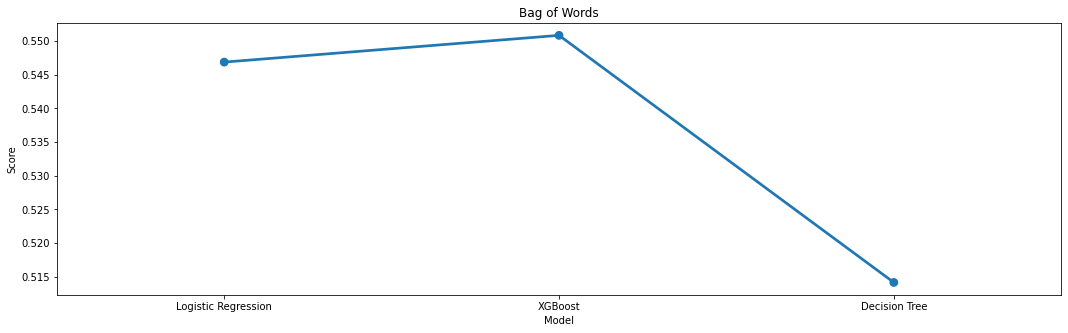

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='Score', data=compare_bow)
plt.title('Bag of Words')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

In [ ]:
# Term Frequency Inverse Document Frequency
compare_tfidf.T

,0,1,2
Model,Logistic Regression,XGBoost,Decision Tree
Score,0.572956,0.531469,0.514143


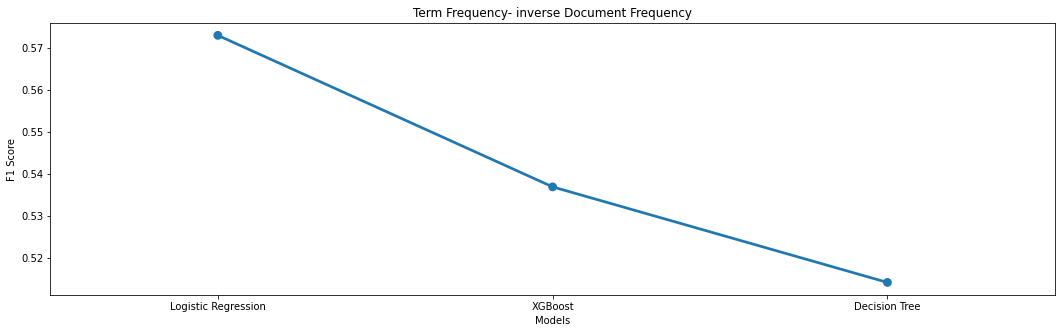

In [ ]:
plt.figure(figsize=(18,5))
sns.pointplot(x='Model',y='Score',data=compare_tfidf)
plt.title('Term Frequency- Inverse Document Frequency')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

The best modle for both the bag-of-Words and TF-IDF algorithms id logistic Regression

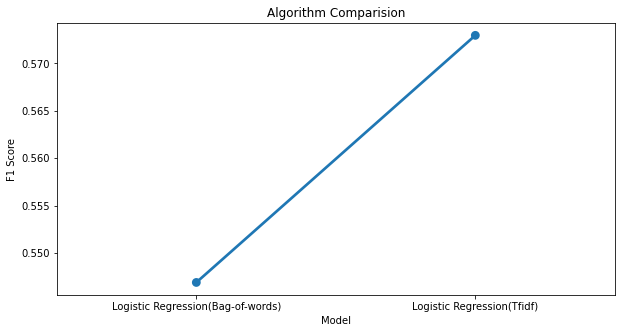

In [ ]:
Algo_best=['Logistic Regression(Bag-of-words)', 'Logistic Regression(Tfidf)']
score_best = [log_bow, log_tfidf]
compare_best = pd.DataFrame({'Model':Algo_best, 'Score':score_best})
# compare_best.
plt.figure(figsize=(10,5))
sns.pointplot(x='Model', y='Score', data=compare_best)
plt.title('Algorithm Comparision')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.show()

# **Predict the results for the test dataset**

In [ ]:
tfidf_test = tfidf_mat[31962:]
test_pred = log_reg.predict_proba(tfidf_test)
test_pred = test_pred[:,1] >= 0.2
test_pred_int = test_pred.astype(np.int)

test_dataset['label'] = test_pred_int

submission = test_dataset[['id','label']]
submission.to_csv('result.csv', index=False)



In [ ]:
# Result::
pd.read_csv('result.csv')

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
